In [55]:
import numpy as np
import scanpy as sc
import scipy
from scipy.sparse import csr_matrix
import scanpy.external as sce
import pandas as pd
import matplotlib.pyplot as plt
#from composition_stats import clr
import anndata as ad
import scirpy as ir
import muon as mu

In [21]:
#! pip install scirpy==0.13.0rc1

In [24]:
help(ir)

Help on package scirpy:

NAME
    scirpy - Python library for single-cell adaptive immune receptor repertoire (AIRR) analysis

PACKAGE CONTENTS
    _compat
    _metadata
    datasets (package)
    get (package)
    io (package)
    ir_dist (package)
    pl (package)
    pp (package)
    tests (package)
    tl (package)
    util (package)

VERSION
    0.12.2

FILE
    /opt/conda/lib/python3.8/site-packages/scirpy/__init__.py




In [3]:
!ls

All_Combined.ipynb  By_Time.ipynb  Full_QC.ipynb    TCR_tasks.ipynb
By_Donor.ipynb	    Clean.ipynb    Full_Xiao.ipynb
By_Thaw.ipynb	    demult.ipynb   README.md


In [29]:
# load in everything, perform batch correction with harmony and the normal qc from scirpy

file_list = [
     ir.io.read_10x_vdj("~/lib_1/outs/per_sample_outs/lib_1/vdj_t/filtered_contig_annotations.csv"), 
     ir.io.read_10x_vdj("~/lib_2/outs/per_sample_outs/lib_2/vdj_t/filtered_contig_annotations.csv"), 
     ir.io.read_10x_vdj("~/lib_3/outs/per_sample_outs/lib_3/vdj_t/filtered_contig_annotations.csv")
]
# 14206, 15031, 14752

#labels = 14206*["lib1"] +  15031* ["lib2"]+ 14752*["lib3"]
new_l = []
for index in range(len(file_list)):
    adata = file_list[index]
    adata.obs["batch"] = "lib_" + str(index)
    new_l.append(adata)
    


In [22]:
tcr_concat = ad.concat(new_l, merge="same")
# add batch labels
tcr_concat.obs_names_make_unique()
# now TCR qc
ir.pp.index_chains(tcr_concat) # only needs airr
ir.tl.chain_qc(tcr_concat) # only needs airr

print(tcr_concat.obs.receptor_subtype)
#raise Error
# further tcr qc
mu.pp.filter_obs(tcr_concat, "chain_pairing", lambda x: x != "multichain")
mu.pp.filter_obs(tcr_concat, "chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))
# it would appear that batch correction is ill-posed here.
# basic dim reduction for each modality
# sc.pp.pca(tcr_concat)
# # batch correction
# sce.pp.harmony_integrate(tcr_concat, 'batch') 
# then save it in same manner as other modalities
tcr_concat.write_h5ad('h5ads/correct_tcr.h5ad')

/opt/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


  0%|          | 0/43989 [00:00<?, ?it/s]

cell_id
AAACCTGAGACTAAGT-1      TRA+TRB
AAACCTGAGAGGGATA-1      TRA+TRB
AAACCTGAGCAATCTC-1      TRA+TRB
AAACCTGAGCCCAGCT-1      TRA+TRB
AAACCTGAGCTCCTCT-1      TRA+TRB
                         ...   
TTTGTCAGTGAAAGAG-1      TRA+TRB
TTTGTCAGTGAAGGCT-1      TRA+TRB
TTTGTCATCACGATGT-1      TRA+TRB
TTTGTCATCCACTGGG-1      TRA+TRB
TTTGTCATCTTGGGTA-1-1    TRA+TRB
Name: receptor_subtype, Length: 43989, dtype: object


FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'h5ads/correct_tcr.h5ad', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [6]:
print(tcr_concat.obs.receptor_subtype.unique())

['TRA+TRB']


In [59]:
help(ir)


Help on package scirpy:

NAME
    scirpy - Python library for single-cell adaptive immune receptor repertoire (AIRR) analysis

PACKAGE CONTENTS
    _compat
    _metadata
    datasets (package)
    get (package)
    io (package)
    ir_dist (package)
    pl (package)
    pp (package)
    tests (package)
    tl (package)
    util (package)

VERSION
    0.13.0rc1

FILE
    /opt/conda/lib/python3.8/site-packages/scirpy/__init__.py




In [30]:
# load in files 
file_list = [
    sc.read_h5ad("/home/jovyan/h5ads/correct_rna.h5ad"),
    sc.read_h5ad("/home/jovyan/h5ads/correct_tcr.h5ad"),
    sc.read_h5ad("/home/jovyan/h5ads/correct_protein.h5ad")
]
for adata in file_list:
    try:
        adata.uns['log1p']["base"] = None 
    except:
        pass
# fill out the mudata object
mdata = mu.MuData({"gex": file_list[0],  
                   "airr": file_list[1],
                   "prot": file_list[2]})

mdata["gex"], mdata["airr"], mdata["prot"]

(AnnData object with n_obs × n_vars = 47024 × 28608
     obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
     var: 'gene_ids', 'featu

In [10]:
mdata["airr"].obs.receptor_subtype

cell_id
AAACCTGAGACTAAGT-1      TRA+TRB
AAACCTGAGCAATCTC-1      TRA+TRB
AAACCTGAGCCCAGCT-1      TRA+TRB
AAACCTGAGCTCCTCT-1      TRA+TRB
AAACCTGAGGACGAAA-1      TRA+TRB
                         ...   
TTTGTCAGTGAAAGAG-1      TRA+TRB
TTTGTCAGTGAAGGCT-1      TRA+TRB
TTTGTCATCACGATGT-1      TRA+TRB
TTTGTCATCCACTGGG-1      TRA+TRB
TTTGTCATCTTGGGTA-1-1    TRA+TRB
Name: receptor_subtype, Length: 40077, dtype: category
Categories (1, object): ['TRA+TRB']

In [11]:
airr_cell_ids = set(mdata["airr"].obs.index)
gex_cell_ids = set(mdata["gex"].obs.index)
prot_cell_ids = set(mdata["prot"].obs.index)

In [12]:
len(airr_cell_ids)

40077

In [13]:
len(gex_cell_ids)

47024

In [ ]:
prot_cell_ids

In [8]:
len(airr_cell_ids), len(gex_cell_ids), len(prot_cell_ids)

(40077, 47024, 47024)

In [10]:
# check if there are cell barcodes that exist in airr and not in gex
#len(airr_cell_ids - gex_cell_ids), len(prot_cell_ids - gex_cell_ids), len(prot_cell_ids - airr_cell_ids), len(airr_cell_ids - prot_cell_ids)
# check if there are cell barcodes that exist in prot and not in gex
len(gex_cell_ids - airr_cell_ids)
# check if there are cell barcodes that exist in prot and not in airr

21596

  0%|          | 0/13524 [00:00<?, ?it/s]

<Axes: >

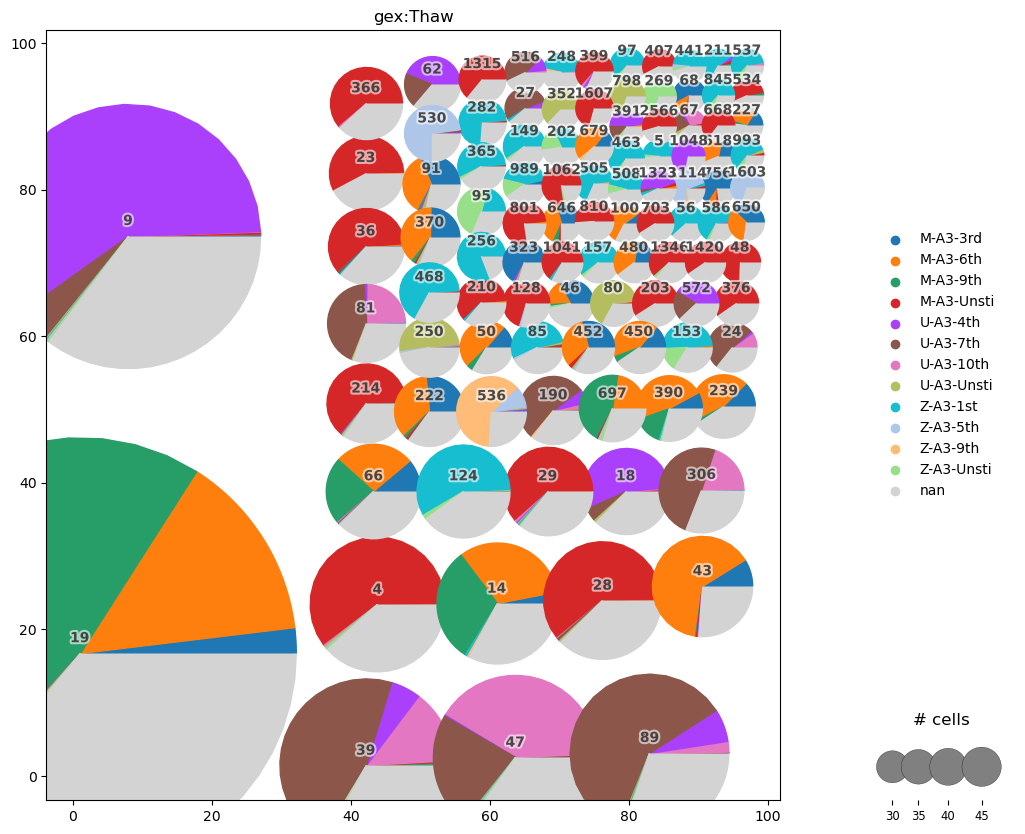

In [15]:
# define clonotypes
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(mdata)
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")
ir.tl.clonotype_network(mdata, min_cells=30) #50, 100 is good
# we don't have source, just use sample labels here
ir.pl.clonotype_network( # color='Thaw'
    mdata,color='gex:Thaw') #, base_size=20, label_fontsize=9, panel_size=(7, 7)
#)

<Axes: >

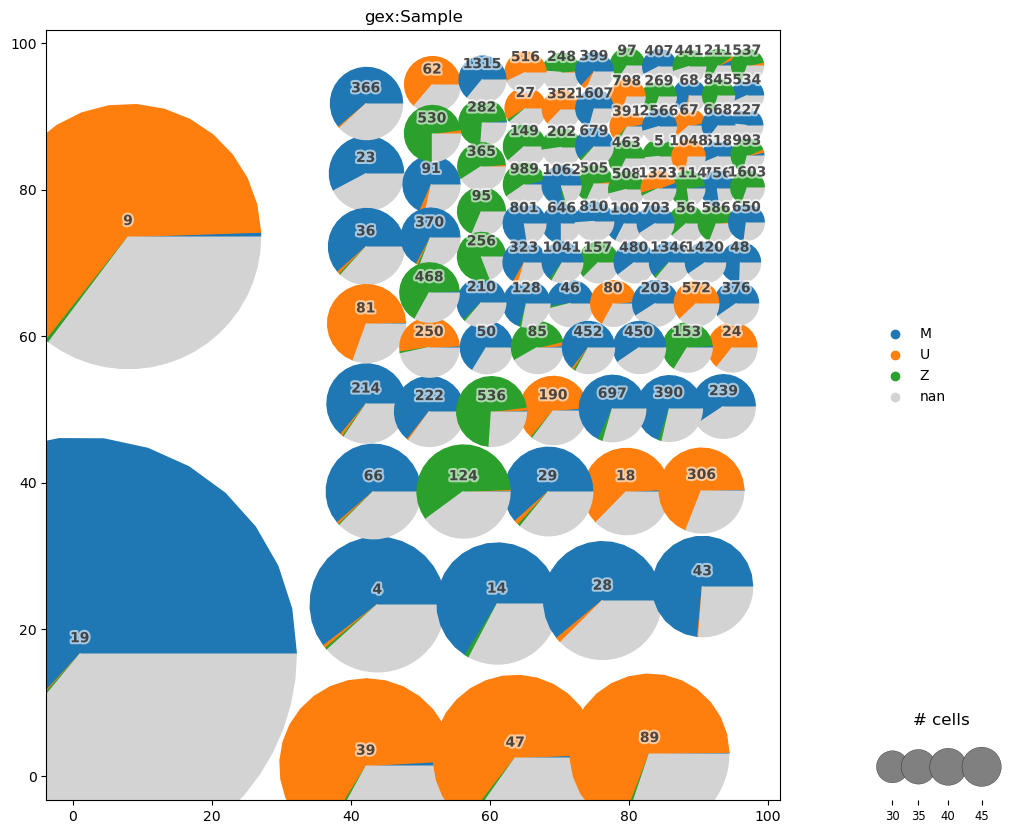

In [62]:
# we don't have source, just use sample labels here
ir.pl.clonotype_network( # color='Thaw'
    mdata,color='gex:Sample') #, base_size=20, label_fontsize=9, panel_size=(7, 7)
#)

<Axes: >

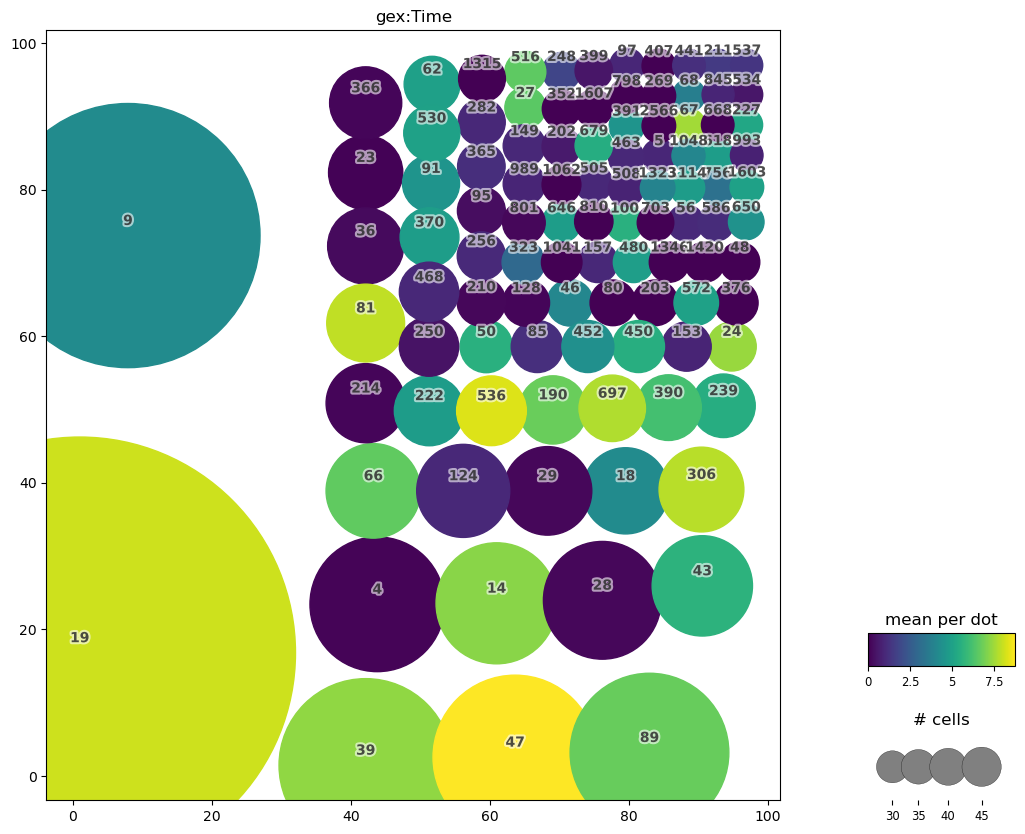

In [63]:
# we don't have source, just use sample labels here
ir.pl.clonotype_network( # color='Thaw'
    mdata,color='gex:Time') #, base_size=20, label_fontsize=9, panel_size=(7, 7)
#)

In [ ]:
# re-compute the clonotype network based on amino-acid sequence similarity and 
# define clonotype clusters.
ir.pp.ir_dist(
    mdata,
    metric="alignment",
    sequence="aa", # tried 15, 25, 10, was garbage
    cutoff=10,# was 15, I would try 10 next -- definitely faster with the smaller number
)
ir.tl.define_clonotype_clusters(
    mdata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir= "primary_only" #"any"
)


  0%|          | 0/34980 [00:00<?, ?it/s]

  0%|          | 0/33670 [00:00<?, ?it/s]

<Axes: >

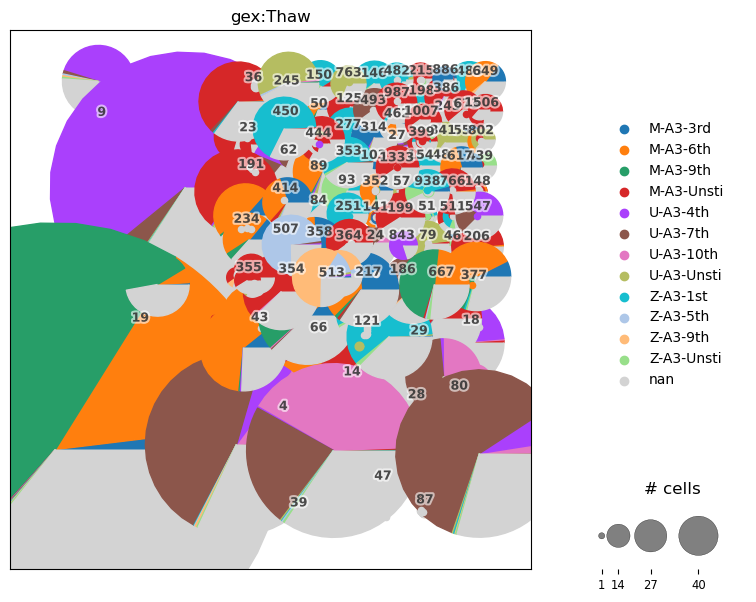

In [75]:
ir.tl.clonotype_network(mdata, min_cells=40, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    mdata, color="gex:Thaw", label_fontsize=9, panel_size=(7, 7), base_size=20
)
# again color by your labels, not theirs

In [ ]:
ir.tl.clonotype_network(mdata, min_cells=33, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    mdata, color="gex:Sample", label_fontsize=9, panel_size=(7, 7), base_size=20
)

In [ ]:
ir.tl.clonotype_network(mdata, min_cells=33, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    mdata, color="gex:Time", label_fontsize=9, panel_size=(7, 7), base_size=20
)

In [7]:
mdata["airr"].obsm['airr']

<Array [[{c_call: 'TRAC', ...}, ...], ...] type='43989 * var * {c_call: ?st...'>

In [4]:
mdata["airr"].obsm['chain_indices']

<Array [{multichain: False, VJ: ..., ...}, ...] type='43989 * {multichain: ...'>

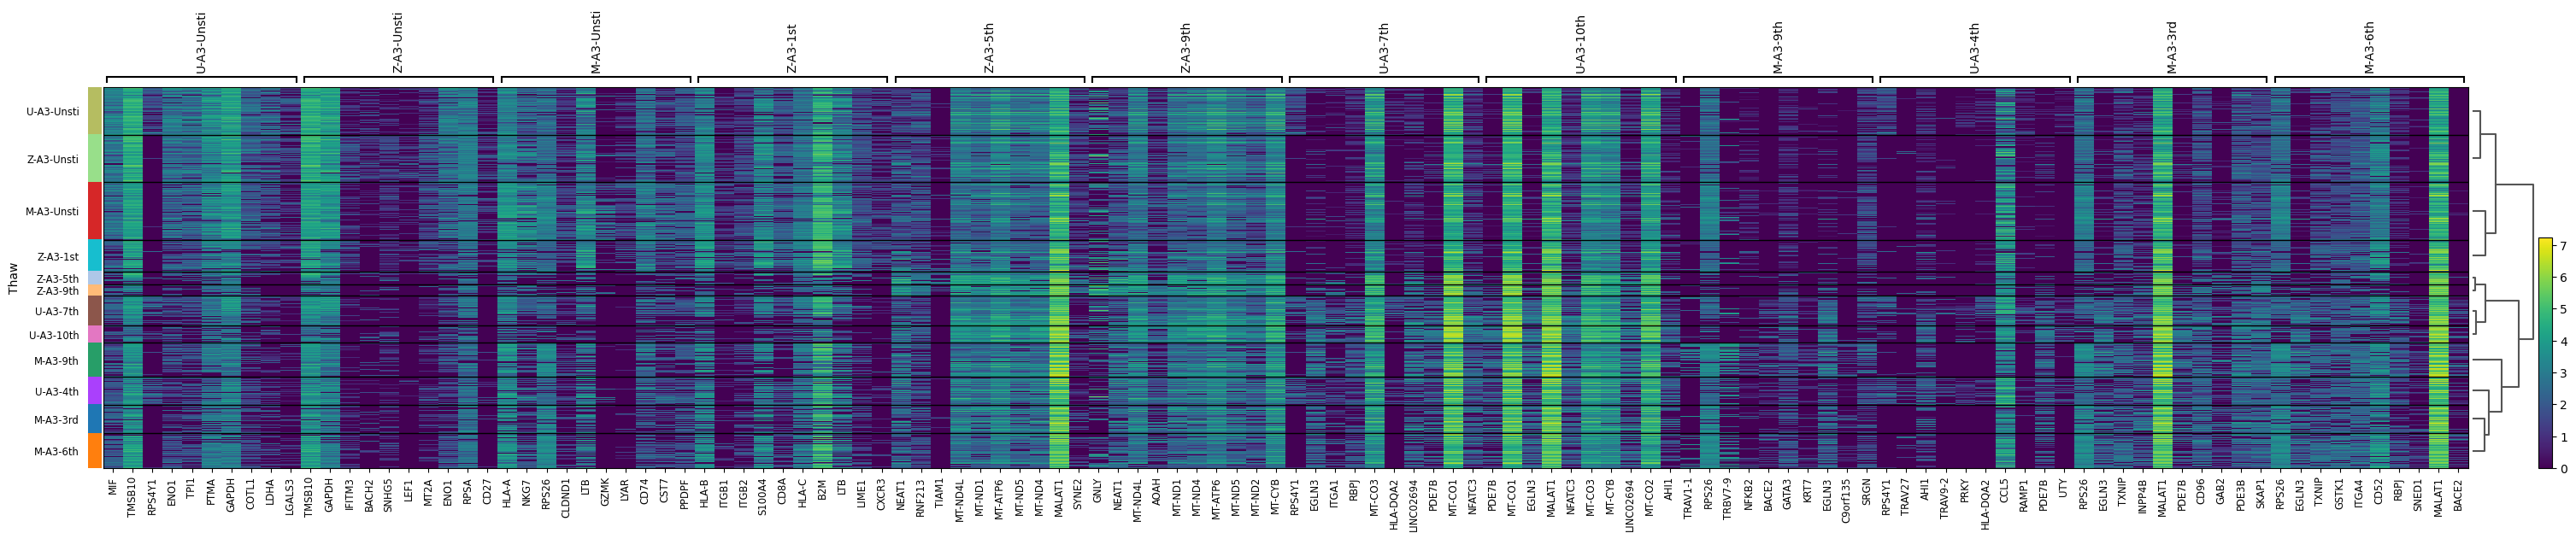

In [4]:
# task 1 
# this is a little more complicated due to the nature of the data itself (these are not even scalars!)

# wants sample by TCR airr heatmap as one graph, 
# with hierarchical clustering on the opposing axises and colored by differential expression
sc.tl.rank_genes_groups(mdata["gex"], groupby='Thaw', method='wilcoxon')#, key_added = "wilcoxon")
#sc.pl.rank_genes_groups(mdata["gex"], n_genes=10, groupby='cluster')
#sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="thaw", groupby="louvain_0.6") 
# you can use this to give you mean expression in groups
sc.pl.rank_genes_groups_heatmap(mdata["gex"], 
                                n_genes=10, groupby='Thaw', show_gene_labels=True,) # save="heatmap.png")

In [18]:
# create some mask on gex data to only have tcr receptor expression

mdata["gex"].var.gene_ids


AL627309.1    ENSG00000238009
AL627309.3    ENSG00000239945
AL627309.5    ENSG00000241860
AP006222.2    ENSG00000286448
LINC01409     ENSG00000237491
                   ...       
AC240274.1    ENSG00000271254
AC004556.3    ENSG00000276345
AC233755.2    ENSG00000277856
AC007325.4    ENSG00000278817
AC007325.2    ENSG00000277196
Name: gene_ids, Length: 28608, dtype: object

In [37]:
mdata["gex"].obs.Thaw 

AAACCTGAGACTAAGT-1        M-A3-3rd
AAACCTGAGAGGGATA-1        M-A3-6th
AAACCTGAGATGTAAC-1      Z-A3-Unsti
AAACCTGAGCAATCTC-1      M-A3-Unsti
AAACCTGAGCCCAGCT-1      U-A3-Unsti
                           ...    
TTTGTCATCACGATGT-1        M-A3-3rd
TTTGTCATCCGCGTTT-1        U-A3-7th
TTTGTCATCCTACAGA-1        M-A3-6th
TTTGTCATCGTCTGCT-1      U-A3-Unsti
TTTGTCATCTTGGGTA-1-1    M-A3-Unsti
Name: Thaw, Length: 47024, dtype: category
Categories (12, object): ['M-A3-3rd', 'M-A3-6th', 'M-A3-9th', 'M-A3-Unsti', ..., 'Z-A3-1st', 'Z-A3-5th', 'Z-A3-9th', 'Z-A3-Unsti']

In [41]:
len(mdata["gex"].obs[mdata["gex"].obs.Thaw == "Z-A3-1st"].index)

3895

In [30]:
mdata["prot"].var.gene_ids

Hu.CD101                                         ADT_C0944
Hu.CD103                                         ADT_C0145
Hu.CD105_43A3                                    ADT_C0068
Hu.CD107a                                        ADT_C0155
Hu.CD112                                         ADT_C0024
                                                   ...    
TotalSeq-C0258 anti-human Hashtag 8 Antibody             8
TotalSeq-C0259 anti-human Hashtag 9 Antibody             9
TotalSeq-C0260 anti-human Hashtag 10 Antibody           10
TotalSeq-C0262 anti-human Hashtag 12 Antibody           12
TotalSeq-C0263 anti-human Hashtag 13 Antibody           13
Name: gene_ids, Length: 149, dtype: object

In [28]:
"ADT_C0090" in list(mdata["prot"].var.gene_ids)
#just do the second paper's qc and redo all the protein + gex stuff
# MouseIgG1, MouseIgG2a, MouseIgG2b, RatIgG2b, RatIgG1, RatIgG2a, and HamsterIgG
# C0090, C0091, C0092, C0095
# match these to ADT tags based on the file Xiao gave you

True

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


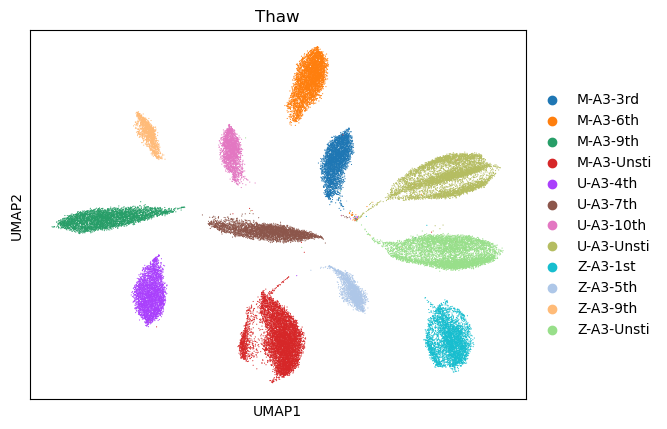

In [5]:
sc.tl.umap(mdata["prot"])
sc.pl.umap(mdata["prot"], color='Thaw',) # save="UMAP.png")

In [ ]:
mdata["gex"]

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


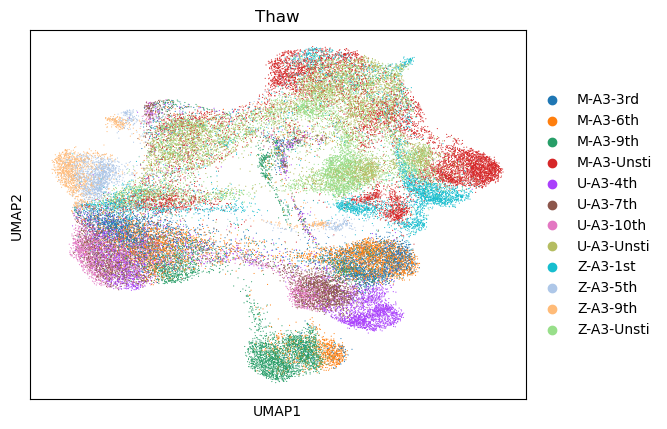

In [17]:
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='Thaw',)

In [40]:
mdata["gex"]

AnnData object with n_obs × n_vars = 47024 × 28608
    obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


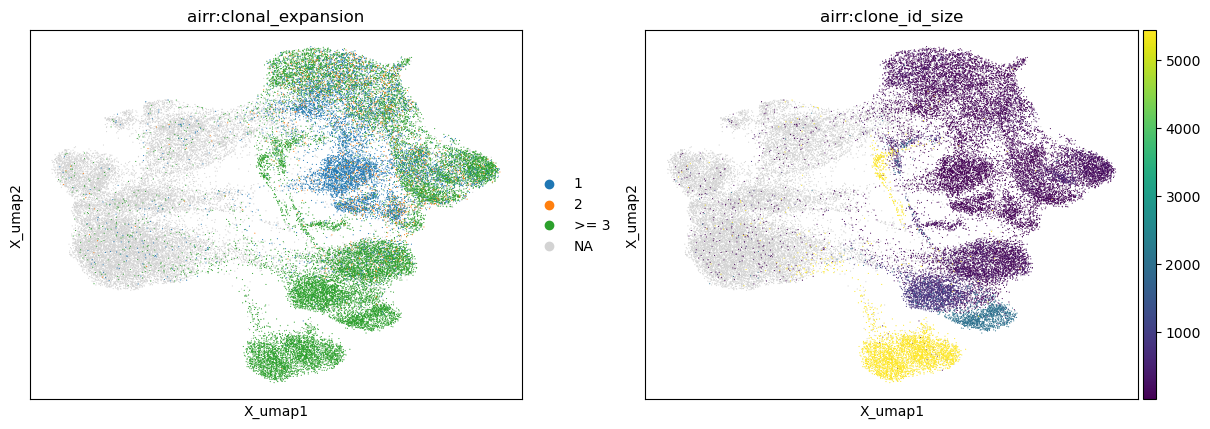

<Axes: >

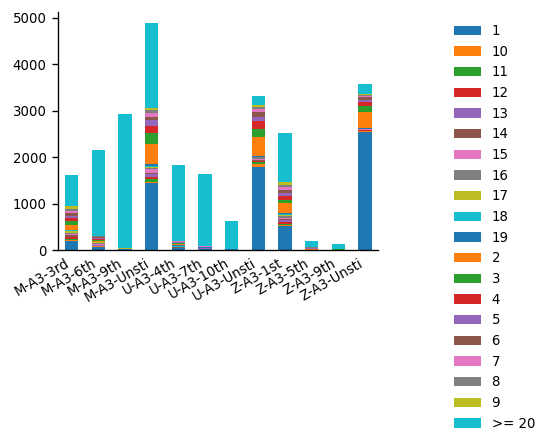

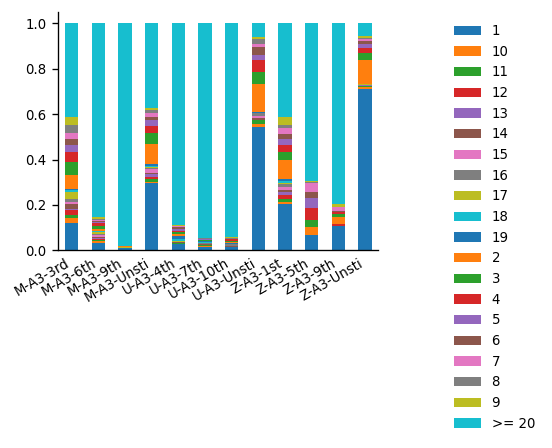

In [18]:
# clonal expansion -- do all this for each sample (do one for all samples, then do by donor)
ir.tl.clonal_expansion(mdata)
mu.pl.embedding(
    mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"]
)
# need to have the rna data umap computed
# again change the groupby to use your sample labels
ir.pl.clonal_expansion( # groupby="gex:cluster"
    mdata, target_col="clone_id" , clip_at=20, normalize=False, groupby="gex:Thaw"
)
ir.pl.clonal_expansion(mdata, target_col="clone_id",clip_at=20, groupby="gex:Thaw")

/opt/conda/lib/python3.8/site-packages/scanpy/tools/_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}


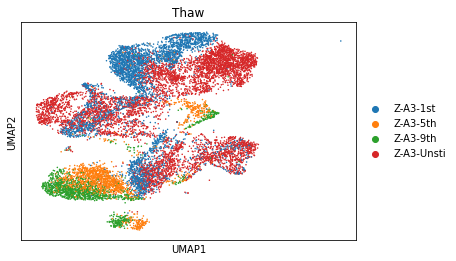

/opt/conda/lib/python3.8/site-packages/scanpy/tools/_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}


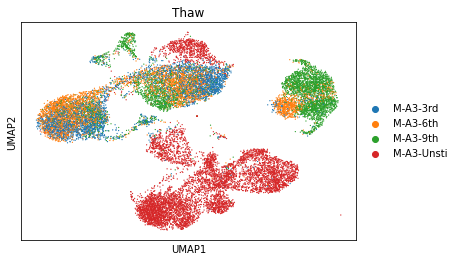

/opt/conda/lib/python3.8/site-packages/scanpy/tools/_umap.py:166: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}


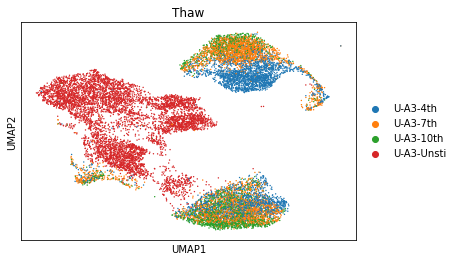

In [15]:
# task 2
# we must be missing a thaw label

# UMAP from protein data, where the clusters are colored by sample name
# create a new column called Sample that applies the predefined sample map
thaw_to_donor = {
    'Z-A3-Unsti' : "Z",
    'Z-A3-1st' : "Z", 
    'Z-A3-5th' : "Z",  
    'Z-A3-9th' : "Z",    
    "M-A3-Unsti" : "M",  
    "M-A3-3rd" : "M",
    "M-A3-6th": "M",
    "M-A3-9th" : "M",
    "U-A3-Unsti" : "U",
    "U-A3-4th" : "U",
    "U-A3-7th": "U",
    "U-A3-10th": "U"
}
# U-A3-Unsti is not getting picked up here

# [print(i)for i in mdata["prot"].obs['Thaw'].unique()]
# raise Error
mdata["prot"].obs["Sample"] = mdata["prot"].obs['Thaw'].map(thaw_to_donor)
mdata["gex"].obs["Sample"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)

Z, M, U = mdata["gex"][mdata["gex"].obs.Sample == "Z"], mdata["gex"][mdata["gex"].obs.Sample == "M"], mdata["gex"][mdata["gex"].obs.Sample == "U"]
sc.tl.umap(Z)
sc.pl.umap(Z, color='Thaw',) # save="UMAP.png")
sc.tl.umap(M)
sc.pl.umap(M, color='Thaw',) # save="UMAP.png")
sc.tl.umap(U)
sc.pl.umap(U, color='Thaw',) # save="UMAP.png")

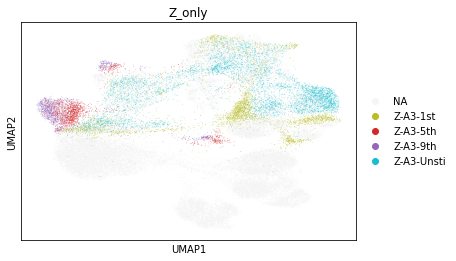

In [107]:
# keep all GEX, but restrict label set to each donor
thaw_to_donor = {
    'Z-A3-Unsti' : "Z-A3-Unsti",
    'Z-A3-1st' : "Z-A3-1st", 
    'Z-A3-5th' : "Z-A3-5th",  
    'Z-A3-9th' : "Z-A3-9th",    
    "M-A3-Unsti" : "NA",  
    "M-A3-3rd" : "NA",
    "M-A3-6th": "NA",
    "M-A3-9th" : "NA",
    "U-A3-Unsti" : "NA",
    "U-A3-4th" : "NA",
    "U-A3-7th": "NA",
    "U-A3-10th": "NA"
}

mdata["gex"].obs["Z_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='Z_only', alpha=0.5, palette={'Z-A3-Unsti':'tab:cyan',
                                                      'Z-A3-1st':'tab:olive',
                                                      'Z-A3-5th':'tab:red',
                                                      "Z-A3-9th":"tab:purple",      
                                                      'NA':'whitesmoke'})

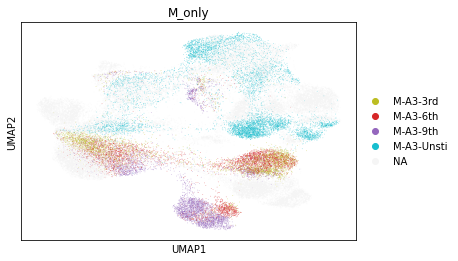

In [109]:
thaw_to_donor = {
    'Z-A3-Unsti' : "NA",
    'Z-A3-1st' : "NA", 
    'Z-A3-5th' : "NA",  
    'Z-A3-9th' : "NA",    
    "M-A3-Unsti" : "M-A3-Unsti",  
    "M-A3-3rd" : "M-A3-3rd",
    "M-A3-6th": "M-A3-6th",
    "M-A3-9th" : "M-A3-9th",
    "U-A3-Unsti" : "NA",
    "U-A3-4th" : "NA",
    "U-A3-7th": "NA",
    "U-A3-10th": "NA"
}
mdata["gex"].obs["M_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='M_only', alpha=0.5, palette={'M-A3-Unsti':'tab:cyan',
                                                      'M-A3-3rd':'tab:olive',
                                                      "M-A3-6th":'tab:red',   
                                                      'M-A3-9th':'tab:purple',
                                                      'NA':'whitesmoke'})

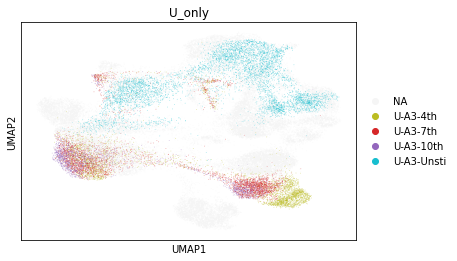

In [110]:
thaw_to_donor = {
    'Z-A3-Unsti' : "NA",
    'Z-A3-1st' : "NA", 
    'Z-A3-5th' : "NA",  
    'Z-A3-9th' : "NA",    
    "M-A3-Unsti" : "NA",  
    "M-A3-3rd" : "NA",
    "M-A3-6th": "NA",
    "M-A3-9th" : "NA",
    "U-A3-Unsti" : "U-A3-Unsti",
    "U-A3-4th" : "U-A3-4th",
    "U-A3-7th": "U-A3-7th",
    "U-A3-10th": "U-A3-10th"
}
mdata["gex"].obs["U_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='U_only', alpha=0.5, palette={'U-A3-Unsti':'tab:cyan',
                                                      'U-A3-4th':'tab:olive',
                                                      'U-A3-7th':'tab:red',
                                                      'U-A3-10th':'tab:purple',
                                                      'NA':'whitesmoke'})

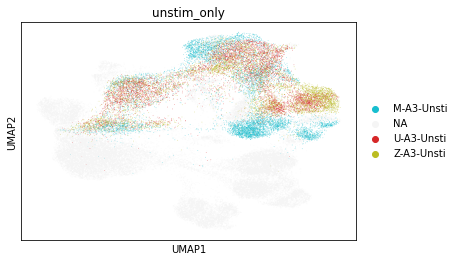

In [36]:
# keep all GEX, but restrict label set to each unstim
thaw_to_donor = {
    'Z-A3-Unsti' : "Z-A3-Unsti",
    'Z-A3-1st' : "NA", 
    'Z-A3-5th' : "NA",  
    'Z-A3-9th' : "NA",    
    "M-A3-Unsti" : "M-A3-Unsti",  
    "M-A3-3rd" : "NA",
    "M-A3-6th": "NA",
    "M-A3-9th" : "NA",
    "U-A3-Unsti" : "U-A3-Unsti",
    "U-A3-4th" : "NA",
    "U-A3-7th": "NA",
    "U-A3-10th": "NA"
}

mdata["gex"].obs["unstim_only"] = mdata["gex"].obs['Thaw'].map(thaw_to_donor)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='unstim_only', alpha=0.5, palette={'M-A3-Unsti':'tab:cyan',
                                                      'Z-A3-Unsti':'tab:olive',
                                                      'U-A3-Unsti':'tab:red',
                                                      'NA':'whitesmoke'})

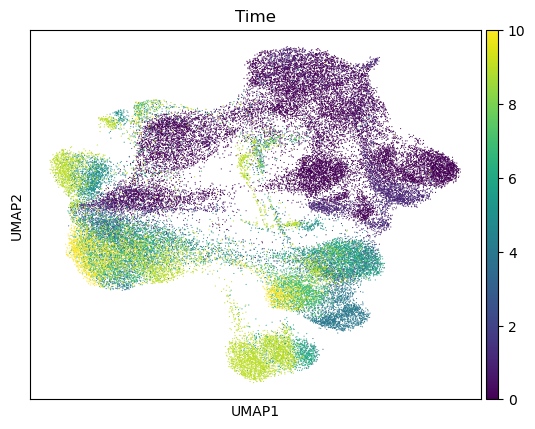

In [46]:
# task 3
# 3 UMAPs (one for each donor), non-TCR-repertoire RNA, color by different time points
# create a new column called Sample that applies the predefined sample map
thaw_to_time = {
    
    'Z-A3-Unsti' : 0,
    'Z-A3-1st' : 1, 
    'Z-A3-5th' : 5,  
    'Z-A3-9th' : 9,    
    "M-A3-Unsti" : 0,  
    "M-A3-3rd" : 3,
    "M-A3-6th": 6,
    "M-A3-9th" : 9,
    "U-A3-Unsti" : 0,
    "U-A3-4th" : 4,
    "U-A3-7th": 7,
    "U-A3-10th": 10
}
mdata["gex"].obs["Time"] = mdata["gex"].obs['Thaw'].map(thaw_to_time)
sc.tl.umap(mdata["gex"])
sc.pl.umap(mdata["gex"], color='Time' )#, save="UMAP.png")

In [50]:
mdata.update()
mdata["gex"]

AnnData object with n_obs × n_vars = 47024 × 28608
    obs: 'TotalSeq-C0251 anti-human Hashtag 1 Antibody', 'TotalSeq-C0252 anti-human Hashtag 2 Antibody', 'TotalSeq-C0253 anti-human Hashtag 3 Antibody', 'TotalSeq-C0254 anti-human Hashtag 4 Antibody', 'TotalSeq-C0255 anti-human Hashtag 5 Antibody', 'TotalSeq-C0256 anti-human Hashtag 6 Antibody', 'TotalSeq-C0257 anti-human Hashtag 7 Antibody', 'TotalSeq-C0258 anti-human Hashtag 8 Antibody', 'TotalSeq-C0259 anti-human Hashtag 9 Antibody', 'TotalSeq-C0260 anti-human Hashtag 10 Antibody', 'TotalSeq-C0262 anti-human Hashtag 12 Antibody', 'TotalSeq-C0263 anti-human Hashtag 13 Antibody', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'Thaw', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'Time', 'Sample'
    var: 'ge

In [82]:
mdata["airr"].obs.batch.index.intersection(mdata["airr"].obs.Thaw.index)

Index(['AAACCTGAGACTAAGT-1', 'AAACCTGAGCAATCTC-1', 'AAACCTGAGCCCAGCT-1',
       'AAACCTGAGGACGAAA-1', 'AAACCTGAGGTGTGGT-1', 'AAACCTGAGTGAACAT-1',
       'AAACCTGCACAACTGT-1', 'AAACCTGCACACCGCA-1', 'AAACCTGCACACGCTG-1',
       'AAACCTGCACATGACT-1',
       ...
       'TTTGTCACAAGGTTCT-1', 'TTTGTCACACTACAGT-1', 'TTTGTCACAGCAGTTT-1',
       'TTTGTCACAGGACCCT-1', 'TTTGTCACAGGTGCCT-1', 'TTTGTCACATGCTAGT-1',
       'TTTGTCACATTAGGCT-1', 'TTTGTCACATTGGGCC-1', 'TTTGTCATCACGATGT-1',
       'TTTGTCATCTTGGGTA-1-1'],
      dtype='object', length=25428)

In [90]:
# remove all barcodes 
#mdata["airr"].obs["Thaw"] =  #.obs.Thaw

# Create a DataFrame from the first column
first_df = pd.DataFrame(mdata["gex"].obs["Thaw"], dtype=object) #mdata["gex"].obs["Thaw"]

# Create a DataFrame from the second column
second_df = pd.DataFrame(mdata["airr"].obs.clonal_expansion ) # mdata["airr"].obs.clonal_expansion

# Perform a left join to align the indices and fill missing values with 'N/A'
aligned_df = first_df.join(second_df, how='right').fillna('N/A')
print(aligned_df)

# Update the 'second_column' in the AnnData object
mdata["airr"].obs["Thaw"] = aligned_df['Thaw']

# 
#mdata["airr"].obs.Thaw, mdata["airr"].obs.clonal_expansion
# Perform a left join to align the indices and fill missing values with 'N/A'
# mdata["airr"].obs["Thaw"] = mdata["gex"].obs["Thaw"].join(mdata["airr"].obs.clonal_expansion,
#                                                           how='left', rsuffix='_second').fillna('N/A')

# Update the 'second_column' in the AnnData object
#adata.obs['second_column'] = aligned_df['second_column_second']
mdata["airr"].obs["Thaw"]

                            Thaw clonal_expansion
cell_id                                          
AAACCTGAGACTAAGT-1      M-A3-3rd                1
AAACCTGAGCAATCTC-1    M-A3-Unsti             >= 3
AAACCTGAGCCCAGCT-1    U-A3-Unsti                1
AAACCTGAGCTCCTCT-1           N/A                1
AAACCTGAGGACGAAA-1    M-A3-Unsti             >= 3
...                          ...              ...
TTTGTCAGTGAAAGAG-1           N/A             >= 3
TTTGTCAGTGAAGGCT-1           N/A                1
TTTGTCATCACGATGT-1      M-A3-3rd             >= 3
TTTGTCATCCACTGGG-1           N/A                1
TTTGTCATCTTGGGTA-1-1  M-A3-Unsti             >= 3

[40077 rows x 2 columns]


cell_id
AAACCTGAGACTAAGT-1        M-A3-3rd
AAACCTGAGCAATCTC-1      M-A3-Unsti
AAACCTGAGCCCAGCT-1      U-A3-Unsti
AAACCTGAGCTCCTCT-1             N/A
AAACCTGAGGACGAAA-1      M-A3-Unsti
                           ...    
TTTGTCAGTGAAAGAG-1             N/A
TTTGTCAGTGAAGGCT-1             N/A
TTTGTCATCACGATGT-1        M-A3-3rd
TTTGTCATCCACTGGG-1             N/A
TTTGTCATCTTGGGTA-1-1    M-A3-Unsti
Name: Thaw, Length: 40077, dtype: object

In [95]:
mdata["airr"].obs["Thaw"]

cell_id
AAACCTGAGACTAAGT-1        M-A3-3rd
AAACCTGAGCAATCTC-1      M-A3-Unsti
AAACCTGAGCCCAGCT-1      U-A3-Unsti
AAACCTGAGCTCCTCT-1             N/A
AAACCTGAGGACGAAA-1      M-A3-Unsti
                           ...    
TTTGTCAGTGAAAGAG-1             N/A
TTTGTCAGTGAAGGCT-1             N/A
TTTGTCATCACGATGT-1        M-A3-3rd
TTTGTCATCCACTGGG-1             N/A
TTTGTCATCTTGGGTA-1-1    M-A3-Unsti
Name: Thaw, Length: 40077, dtype: object

In [98]:
mdata["airr"][mdata["airr"].obs["Thaw"] == thaw_name]

View of AnnData object with n_obs × n_vars = 210 × 0
    obs: 'batch', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'clonal_expansion', 'M-A3-3rd_clonal_expansion', 'M-A3-3rd_clone_id_size', 'M-A3-6th_clonal_expansion', 'M-A3-6th_clone_id_size', 'Z-A3-Unsti_clonal_expansion', 'Z-A3-Unsti_clone_id_size', 'M-A3-Unsti_clonal_expansion', 'M-A3-Unsti_clone_id_size', 'U-A3-Unsti_clonal_expansion', 'U-A3-Unsti_clone_id_size', 'U-A3-4th_clonal_expansion', 'U-A3-4th_clone_id_size', 'M-A3-9th_clonal_expansion', 'M-A3-9th_clone_id_size', 'Thaw', 'U-A3-7th_clonal_expansion', 'U-A3-7th_clone_id_size', 'U-A3-10th_clonal_expansion', 'U-A3-10th_clone_id_size', 'Z-A3-9th_clonal_expansion', 'Z-A3-9th_clone_id_size', 'Z-A3-1st_clonal_expansion', 'Z-A3-1st_clone_id_size'
    uns: 'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network'
    obsm: 'airr', 'chain_indices', 'X_clonotype_network'

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/551 [00:00<?, ?it/s]

M-A3-3rd


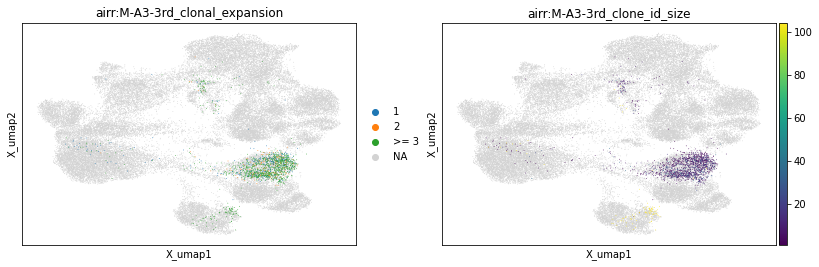

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/244 [00:00<?, ?it/s]

M-A3-6th


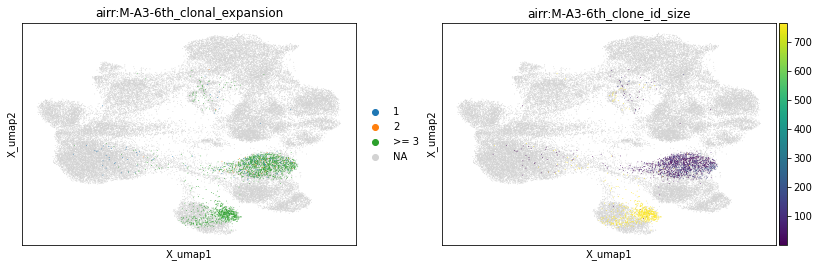

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/3063 [00:00<?, ?it/s]

Z-A3-Unsti


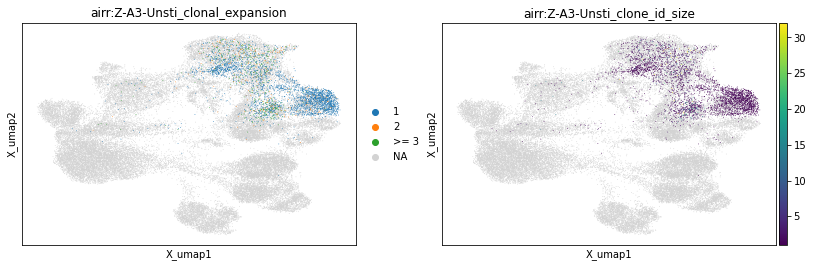

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/2176 [00:00<?, ?it/s]

M-A3-Unsti


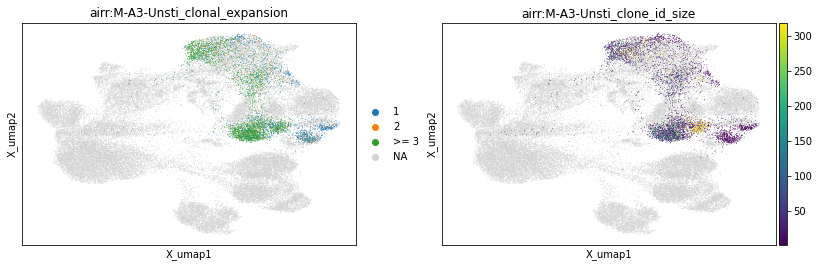

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/2386 [00:00<?, ?it/s]

U-A3-Unsti


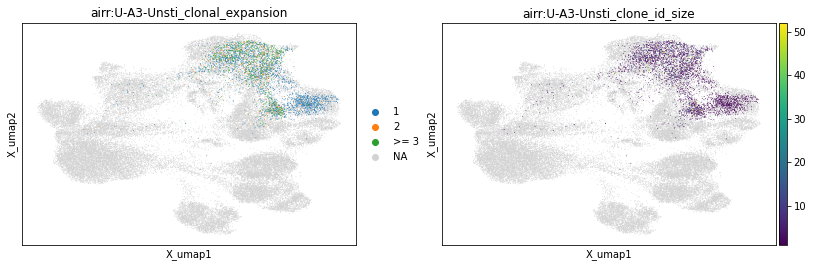

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/139 [00:00<?, ?it/s]

U-A3-4th


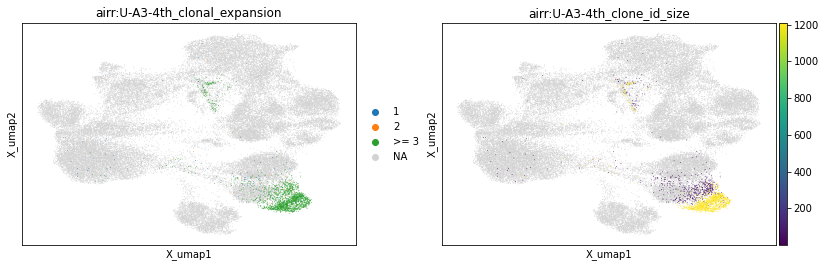

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/75 [00:00<?, ?it/s]

M-A3-9th


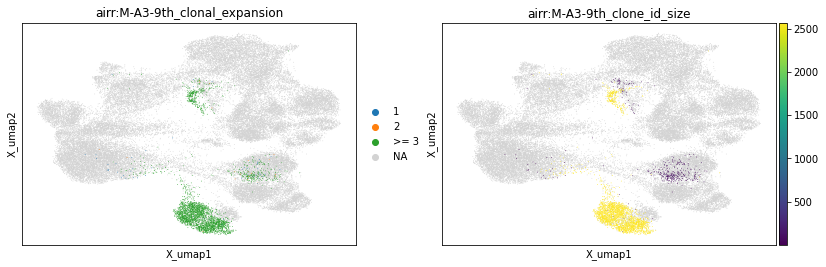

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/88 [00:00<?, ?it/s]

U-A3-7th


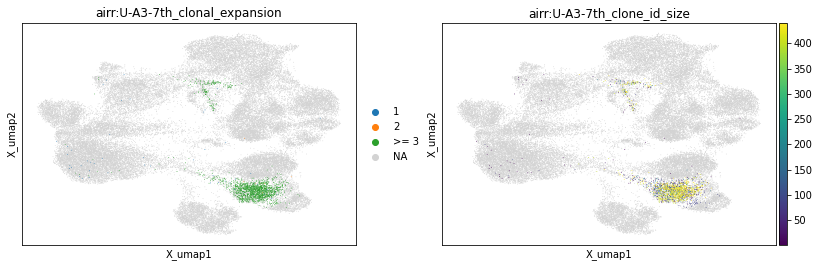

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/51 [00:00<?, ?it/s]

U-A3-10th


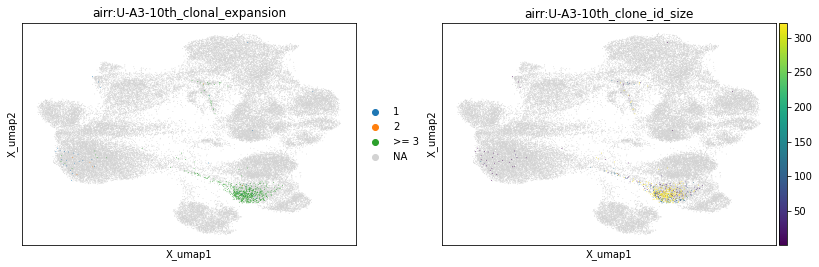

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/36 [00:00<?, ?it/s]

Z-A3-9th


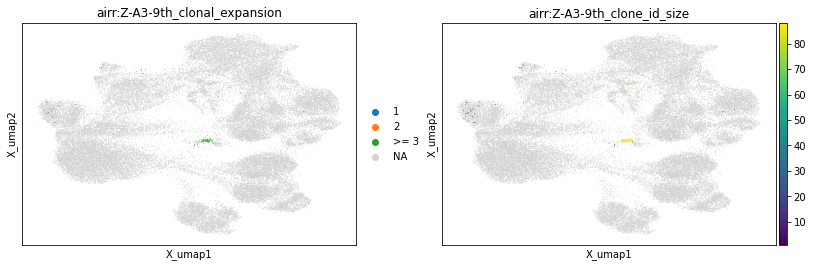

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/982 [00:00<?, ?it/s]

Z-A3-1st


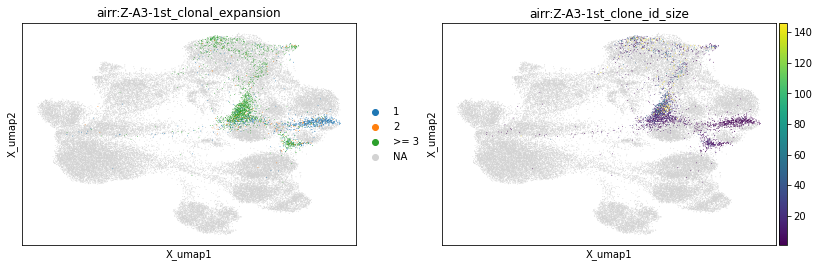

/opt/conda/lib/python3.8/site-packages/scirpy/ir_dist/__init__.py:245: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  params.adata.uns[key_added] = result


  0%|          | 0/61 [00:00<?, ?it/s]

Z-A3-5th


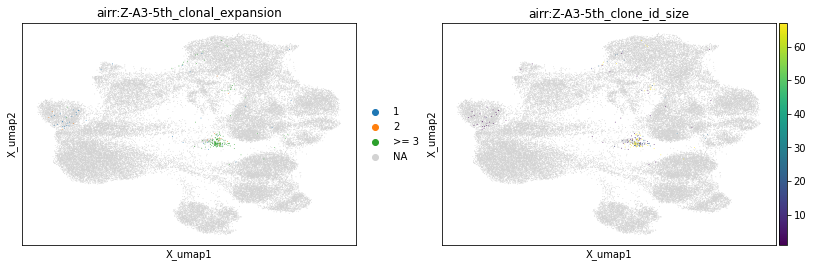

In [103]:
# clonal expansion -- do all this for each sample (do one for all samples, then do by donor)
for thaw_name in mdata["gex"].obs.Thaw.unique():
    # so now we want to apply the thaw labels to the airr and subset on that
    
    mdata_subset = mu.MuData({"gex": mdata["gex"][mdata["gex"].obs.Thaw == thaw_name],  
                   "airr": mdata["airr"][mdata["airr"].obs["Thaw"] == thaw_name],
                   "prot": mdata["prot"][mdata["prot"].obs.Thaw == thaw_name]})
    
    
    #print(mdata_subset["airr"])
    # using default parameters, `ir_dist` will compute nucleotide sequence identity
    # compute the  clonotypes on the subset but plot the rest                         
    ir.pp.ir_dist(mdata_subset)
    ir.tl.define_clonotypes(mdata_subset, receptor_arms="all", dual_ir="primary_only")
    #ir.tl.clonotype_network(mdata_subset, min_cells=30)
    ir.tl.clonal_expansion(mdata_subset)
    #print(mdata_subset["airr"].obs)#["clonal_expansion"])
    ce_name = thaw_name +"_clonal_expansion"
    ci_name = thaw_name + "_clone_id_size"
    mdata["airr"].obs[ce_name] = mdata_subset["airr"].obs["clonal_expansion"]
    mdata["airr"].obs[ci_name] = mdata_subset["airr"].obs["clone_id_size"]
#     temp_mdata = mu.MuData({"gex": file_list[0],  
#                    "airr": file_list[1],
#                    "prot": file_list[2]})
    mdata.update() # this shouldn't do anything
    print(thaw_name)
    mu.pl.embedding(
        mdata, basis="gex:umap", color=["airr:"+ce_name, "airr:"+ci_name]
    )
    # need to have the rna data umap computed
    # again change the groupby to use your sample labels
    #ir.pl.clonal_expansion( # groupby="gex:cluster"
    #    mdata_subset, target_col="clone_id" , clip_at=10, normalize=False, groupby="gex:Sample"
    #)
    #ir.pl.clonal_expansion(mdata_subset, target_col="clone_id", clip_at=10, groupby="gex:Sample")

/root/mambaforge/envs/Xiao/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


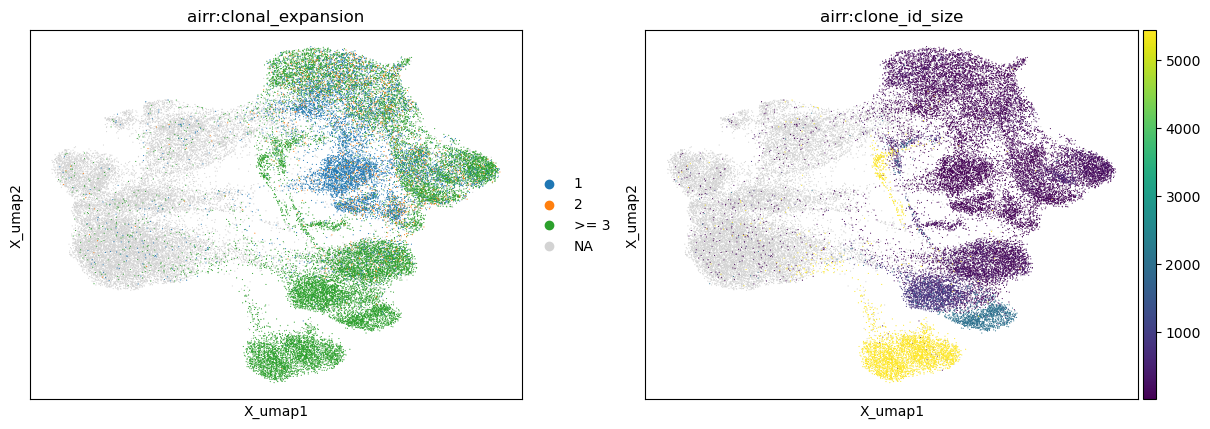

<Axes: >

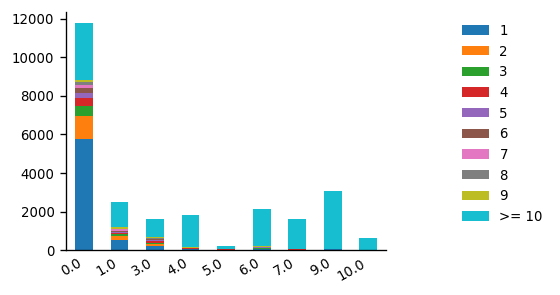

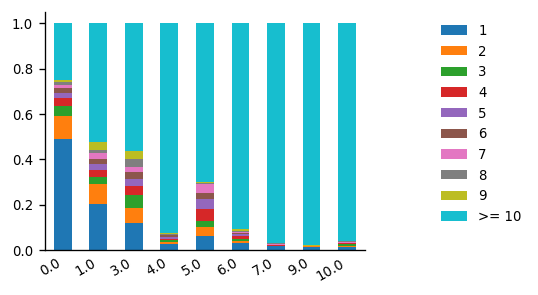

In [58]:
# clonal expansion -- do all this for each sample (do one for all samples, then do by donor)
ir.tl.clonal_expansion(mdata)
mu.pl.embedding(
    mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"]
)
# need to have the rna data umap computed
# again change the groupby to use your sample labels
ir.pl.clonal_expansion( # groupby="gex:cluster"
    mdata, target_col="clone_id" , clip_at=10, normalize=False, groupby="gex:Time"
)
ir.pl.clonal_expansion(mdata, target_col="clone_id", clip_at=10, groupby="gex:Time")

In [12]:
# now let's examine the tcr data more
mdata["airr"].obs.receptor_type

cell_id
AAACCTGAGACTAAGT-1      TCR
AAACCTGAGAGGGATA-1      TCR
AAACCTGAGCAATCTC-1      TCR
AAACCTGAGCCCAGCT-1      TCR
AAACCTGAGCTCCTCT-1      TCR
                       ... 
TTTGTCAGTGAAAGAG-1      TCR
TTTGTCAGTGAAGGCT-1      TCR
TTTGTCATCACGATGT-1      TCR
TTTGTCATCCACTGGG-1      TCR
TTTGTCATCTTGGGTA-1-1    TCR
Name: receptor_type, Length: 43989, dtype: category
Categories (1, object): ['TCR']

In [13]:
mdata["airr"].obs.receptor_subtype

cell_id
AAACCTGAGACTAAGT-1      TRA+TRB
AAACCTGAGAGGGATA-1      TRA+TRB
AAACCTGAGCAATCTC-1      TRA+TRB
AAACCTGAGCCCAGCT-1      TRA+TRB
AAACCTGAGCTCCTCT-1      TRA+TRB
                         ...   
TTTGTCAGTGAAAGAG-1      TRA+TRB
TTTGTCAGTGAAGGCT-1      TRA+TRB
TTTGTCATCACGATGT-1      TRA+TRB
TTTGTCATCCACTGGG-1      TRA+TRB
TTTGTCATCTTGGGTA-1-1    TRA+TRB
Name: receptor_subtype, Length: 43989, dtype: category
Categories (1, object): ['TRA+TRB']

In [14]:
mdata["airr"].obs.chain_pairing

cell_id
AAACCTGAGACTAAGT-1         extra VJ
AAACCTGAGAGGGATA-1        orphan VJ
AAACCTGAGCAATCTC-1         extra VJ
AAACCTGAGCCCAGCT-1      single pair
AAACCTGAGCTCCTCT-1        extra VDJ
                           ...     
TTTGTCAGTGAAAGAG-1      single pair
TTTGTCAGTGAAGGCT-1      single pair
TTTGTCATCACGATGT-1         extra VJ
TTTGTCATCCACTGGG-1      single pair
TTTGTCATCTTGGGTA-1-1    single pair
Name: chain_pairing, Length: 43989, dtype: category
Categories (6, object): ['extra VDJ', 'extra VJ', 'orphan VDJ', 'orphan VJ', 'single pair', 'two full chains']